# Pyber Ride Sharing

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [3]:
# City Data
city_data = pd.read_csv(city_data_to_load)
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
# Ride Data
ride_data = pd.read_csv(ride_data_to_load)
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:
# Merge dataset
combine_city_ride_data = pd.merge(ride_data, city_data, on=["city", "city"])

In [6]:
combine_city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


# Create Bubble Plot

In [7]:
urban_cities = combine_city_ride_data.loc[combine_city_ride_data["type"] == "Urban"]
suburban_cities = combine_city_ride_data.loc[combine_city_ride_data["type"] == "Suburban"]
rural_cities = combine_city_ride_data.loc[combine_city_ride_data["type"] == "Rural"]

In [8]:
from helper import *

In [9]:
urban_ride_count, urban_avg_fare, urban_driver_count = get_ride_count_avg_fare_and_driver_count_by_city(urban_cities)
suburban_ride_count, suburban_avg_fare, suburban_driver_count = get_ride_count_avg_fare_and_driver_count_by_city(suburban_cities)
rural_ride_count, rural_avg_fare, rural_driver_count = get_ride_count_avg_fare_and_driver_count_by_city(rural_cities)

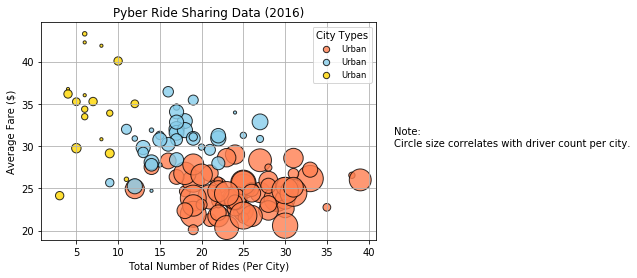

In [10]:
plt.scatter(
    urban_ride_count, 
    urban_avg_fare, 
    s=10*urban_driver_count,
    c="coral", 
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Urban"
)
plt.scatter(
    suburban_ride_count, 
    suburban_avg_fare, 
    s=10*suburban_driver_count,
    c="skyblue", 
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Urban"
)
plt.scatter(
    rural_ride_count, 
    rural_avg_fare, 
    s=10*rural_driver_count,
    c="gold", 
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Urban"
)
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
lgnd = plt.legend(
    fontsize="small",
    mode="Expanded", 
    numpoints=1,
    scatterpoints=1, 
    loc="best",
    title="City Types", 
    labelspacing=0.5
)
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]
plt.text(43, 30, "Note:\nCircle size correlates with driver count per city.")
plt.show()

# Total Fares by City Type

In [11]:
total_fare = combine_city_ride_data.sum()['fare']

In [12]:
fare_percentage_by_type = combine_city_ride_data.groupby(['type']).sum()['fare']/total_fare
fare_percentage_by_type

type
Rural       0.068115
Suburban    0.304639
Urban       0.627246
Name: fare, dtype: float64

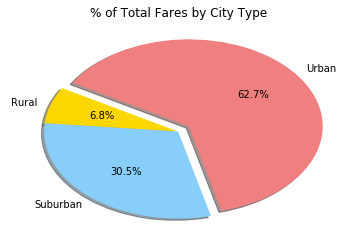

In [13]:
plt.pie(
    fare_percentage_by_type, 
    labels=["Rural", "Suburban", "Urban"], 
    colors=["gold", "lightskyblue", "lightcoral"], 
    explode=[0, 0, 0.1], 
    autopct='%1.1f%%', 
    shadow=True,
    startangle=150
)
plt.title("% of Total Fares by City Type")

plt.show()